# Load Saved Model and Test the data

## Agenda:
1. Load Saved model
	- List out contents of folder where logs and model is saved
	- Loading the graph
		- Create session
	- Get access to input and output tensors
2. Get data for Prediction
3. Predict the random test data
4. Visualize predicted data
5. Close the session

In [2]:
import tensorflow as tf

tf.reset_default_graph()

### List out contents of folder where logs and model is saved

In [5]:
!dir \tmp\mnist\lr1

 Volume in drive C is OSDisk
 Volume Serial Number is F4D6-5CAC

 Directory of C:\tmp\mnist\lr1

05-10-2018  05:55    <DIR>          .
05-10-2018  05:55    <DIR>          ..
05-10-2018  05:55               113 checkpoint
05-10-2018  05:55            59.381 events.out.tfevents.1538699055.BDC8-LX-602191F
05-10-2018  05:55            31.400 mnist_lr.ckpt.data-00000-of-00001
05-10-2018  05:55               167 mnist_lr.ckpt.index
05-10-2018  05:55            22.931 mnist_lr.ckpt.meta
               5 File(s)        113.992 bytes
               2 Dir(s)  10.879.340.544 bytes free


### Explanation of TensorFlow saved files

1.   Graph structure is saved in '.meta' file
2.   Data for the graph is saved in '.data-xxxxx-of-yyyyy'
3.   'events.out.tfevents.xxxx' has logging data
4.  'checkpoint' tracks different checkpoints taken at different times 

### Loading the graph

In [6]:
#Directory where graph and data is stored
log_dir = '/tmp/mnist/lr1'
model_name = 'mnist_lr.ckpt'

#Start the session
sess = tf.Session()

#Load Graph
new_saver = tf.train.import_meta_graph(log_dir + '/' + model_name + '.meta')

#Load Weights and Bias
new_saver.restore(sess, log_dir + '/' + model_name)

INFO:tensorflow:Restoring parameters from /tmp/mnist/lr1/mnist_lr.ckpt


## Get access to input and output tensors

In [7]:
#Get access to current graph
graph = tf.get_default_graph()

#Get input tensor
x = graph.get_tensor_by_name('input/x-input:0')

#Get output tensor
y = graph.get_tensor_by_name('Accuracy/Predict:0')

### Get Data for Prediction

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
testX = mnist.test.images
testY = mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Start Prediction

In [9]:
#Predict price
predicted_nums = sess.run([y], feed_dict={x:testX})

print(predicted_nums[0])

[7 2 1 ... 4 8 6]


In [10]:
len(predicted_nums[0])

10000

### Visualizing results

In [11]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

Actual :  8 Prediction :  8


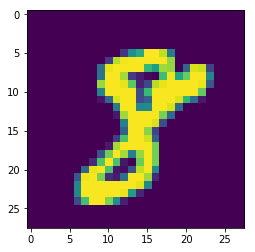

In [12]:
#Get a random image number
image_num = np.random.randint(testX.shape[0])

print('Actual : ', np.argmax(testY[image_num]), 
      'Prediction : ', predicted_nums[0][image_num])
plt.imshow(np.reshape(testX[image_num],(28,28)))

### IMPORTANT - close the session

In [13]:
sess.close()